In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("twitter_training.csv") 

df.head()

df.columns

df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)
df.rename(columns={'Positive': 'level'}, inplace=True)
df['level'].value_counts()

df = df.drop(['Borderlands', '2401'],axis=1)

df.head()

label_mapping = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}

df['level']=df['level'].map(label_mapping)

df['level'].value_counts()


level
0    22542
1    20831
2    18318
3    12990
Name: count, dtype: int64

In [2]:
df.shape

(74681, 2)

In [3]:
df = df.iloc[:25000,:]

In [4]:
df.shape

(25000, 2)

<Axes: xlabel='level'>

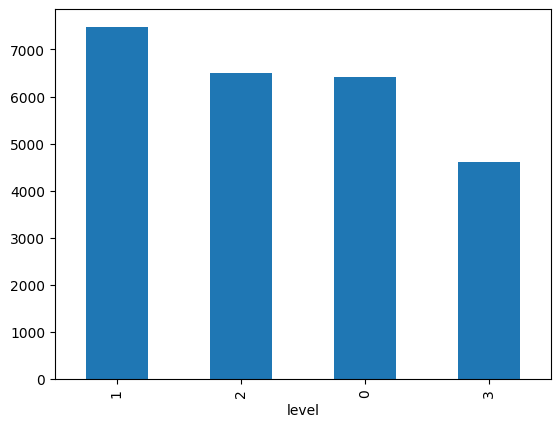

In [5]:
df['level'].value_counts().plot(kind='bar')

In [6]:
df['text'][100]

'Grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game. I seriously can’t wait on this shitty trend to die'

In [7]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [8]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub(r'[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')
    
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    return " ".join(text)

In [9]:
preprocessing('this is my tags<h1> :) <p>hello world<p> <div> <div> </h2>')

'tag hello world :)'

In [11]:
df['text']=df['text'].astype(str)

In [12]:
df['text']=df['text'].apply(lambda x: preprocessing(x))

In [18]:
df['text']

0                                         come border kill
1                                   im get borderland kill
2                                im come borderland murder
3                               im get borderland 2 murder
4                                 im get borderland murder
                               ...                        
24995          jade everi singl fuck thing life wait googl
24996                       get bore everi damn thing life
24997             stutter everi fuck thing life wait googl
24998                 jade singl fuck thing web wait googl
24999    x nice jade everi singl fuck thing life wait g...
Name: text, Length: 25000, dtype: object

In [28]:
#positivedata = df[df['level']==1]
#positivedata = positivedata['text']

In [23]:
#negdata = df[df['level']==0]
#negdata = negdata['text']

In [24]:
#from collections import Counter

In [25]:
#positivedata_words = ' '.join(positivedata).split()
#positivedata_word_counts = Counter(positivedata_words)
#positivedata_common_words = positivedata_word_counts.most_common(10)

In [29]:
#negdata_words = ' '.join(negdata).split()
#negdata_word_counts = Counter(negdata_words)
#negdata_common_words = negdata_word_counts.most_common(10)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=df.level.values
x=tfidf.fit_transform(df.text)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.5, shuffle=False)

In [41]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=6, scoring='accuracy',random_state=0,n_jobs=-1, verbose=3, max_iter=500).fit(X_train,y_train)
y_pred= clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   26.1s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   26.4s finished


In [42]:
from sklearn import metrics

In [43]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.44128


In [44]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))